## 이상치탐지

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## 원본 데이터 Load

In [2]:
# 원본 데이터 Load

filename_set = [
    "SKT_충전데이터_원본_한전_23.03.08",
    "SKT_충전데이터_원본_환경부_제주도청_23.03.08",
]
print("[*] Load the dataset")

raw_df = pd.DataFrame()
for filename in filename_set:
    df = pd.read_csv("%s.csv" % filename, engine='python', encoding='cp949')
    
    raw_df = pd.concat([raw_df, df], axis=0)
raw_df.reset_index(drop=True, inplace=True)

raw_df["충전시작시각"] = pd.to_datetime(raw_df["충전시작시각"])
raw_df["충전종료시각"] = pd.to_datetime(raw_df["충전종료시각"])

ev_df = raw_df.copy()

display(ev_df)

[*] Load the dataset


,운영기관,충전소명,충전소ID,충전기명,충전기ID,충전기타입,충전시작시각,충전종료시각,충전시간,충전량,...,충전소구분,주소,충전시작년월일,충전종료년월일,초차이,분차이,충전시작분,충전종료분,최대충전량,충전량차이
0,한국전력,스마트그리드 홍보관,KPxxxx,급속03,579,급속,2021-01-01 00:04:00,2021-01-01 00:20:00,KPxxxx,3.14,...,공용,제주특별자치도 제주시 구좌읍 행원리 575-20,2021-01-01,2021-01-01,921,15,4,20,12.500000,-9.360000
1,한국전력,서귀포지사,KPxxxx,급속02,8819,급속,2021-01-01 00:46:00,2021-01-01 02:04:00,KPxxxx,36.39,...,공용,제주특별자치도 서귀포시 신중로 56,2021-01-01,2021-01-01,4653,77,46,124,64.166667,-27.776667
2,한국전력,화북주공2 아파트,KPxxxx,급속01,5844,급속,2021-01-01 01:23:00,2021-01-01 01:59:00,KPxxxx,20.58,...,아파트용,제주특별자치도 제주시 동화로1길 39,2021-01-01,2021-01-01,2157,35,83,119,29.166667,-8.586667
3,한국전력,영산홍주택,KPxxxx,급속01,7863,급속,2021-01-01 01:26:00,2021-01-01 04:57:00,KPxxxx,30.17,...,아파트용,제주특별자치도 제주시 이도2동 405,2021-01-01,2021-01-01,12661,211,86,297,175.833333,-145.663333
4,한국전력,제주도교육청,KPxxxx,급속02,8029,급속,2021-01-01 01:28:00,2021-01-01 03:07:00,KPxxxx,17.50,...,공용,제주특별자치도 제주시 연동 311-46,2021-01-01,2021-01-01,5918,98,88,187,81.666667,-64.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057018,제주특별자치도,한국교통방송 제주본부,JD110036,한국교통방송 제주본부_02,2,DC콤보,2022-06-22 23:15:00,2022-06-22 23:47:00,0:32:23,21.15,...,공용,missing,2022-06-22,2022-06-22,1920,32,1395,1427,26.666667,-5.516667
1057019,제주특별자치도,구좌읍주민센터,JD100011,구좌읍주민센터_01,1,AC급속3상,2022-06-22 23:25:00,2022-06-22 23:36:00,0:10:45,6.71,...,공용,missing,2022-06-22,2022-06-22,660,11,1405,1416,9.166667,-2.456667
1057020,제주특별자치도,동화초등학교 공영주차장,JD110002,동화초등학교 공영주차장_01,1,DC차데모,2022-06-22 23:28:00,2022-06-22 23:39:00,0:10:59,5.34,...,공용,missing,2022-06-22,2022-06-22,660,11,1408,1419,9.166667,-3.826667
1057021,제주특별자치도,하귀1리공영주차장,JD110070,하귀1리공영주차장_02,2,AC급속3상,2022-06-22 23:32:00,2022-06-22 23:51:00,0:19:13,10.35,...,공용,missing,2022-06-22,2022-06-22,1140,19,1412,1431,15.833333,-5.483333


## 이상치 제거 전

1057023


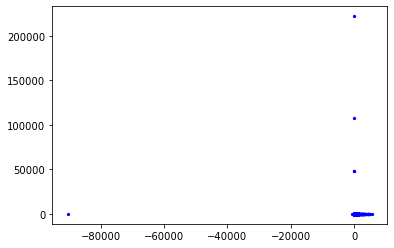

In [3]:
print(len(ev_df))

fig, ax = plt.subplots()
ax.scatter(ev_df['분차이'], ev_df['충전량'], s=5, c='b')

## 이상치 제거 1

1057008


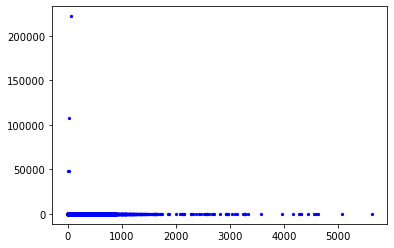

In [4]:
# 이상치 제거 1

idx = list(ev_df.loc[ev_df['초차이'] < 0, :].index)
ev_df.drop(idx, axis=0, inplace=True)

print(len(ev_df))

fig, ax = plt.subplots()
ax.scatter(ev_df['분차이'], ev_df['충전량'], s=5, c='b')

## 이상치 제거 2
- 충전량 2, 75

1003696


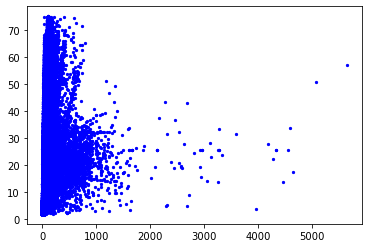

In [5]:
# 이상치 제거 2

idx = list(ev_df.loc[(ev_df['충전량'] < 2) | (ev_df['충전량'] > 75), :].index)
ev_df.drop(idx, axis=0, inplace=True)

print(len(ev_df))

fig, ax = plt.subplots()
ax.scatter(ev_df['분차이'], ev_df['충전량'], s=5, c='b')

## 이상치 제거 3
- 충전시간 : 3분 미만, 120분 초과

987592


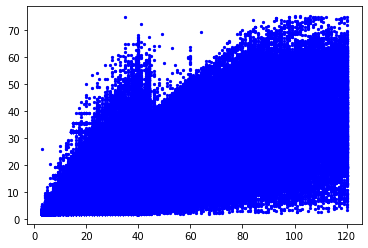

In [6]:
# 이상치 제거 3

idx = list(ev_df.loc[(ev_df['분차이'] < 3) | (ev_df['분차이'] > 120), :].index)
ev_df.drop(idx, axis=0, inplace=True)

print(len(ev_df))

fig, ax = plt.subplots()
ax.scatter(ev_df['분차이'], ev_df['충전량'], s=5, c='b')

## 이상치 제거 4
- 측정된 충전량이 최대 충전량보다 3 kWh 큰 경우 : 삭제
- 측정된 충전량이 최대 충전량보다 3 kWh 작은 경우 : 최대 충전량으로 변경
- '충전량차이' = 충전량 - 최대충전량으로 음수가 나와야 정상

972258


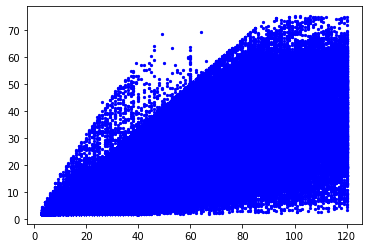

In [7]:
# 이상치 제거 4

idx = list(ev_df.loc[ev_df['충전량차이'] > 3, :].index)
ev_df.drop(idx, axis=0, inplace=True)

replace = ev_df.loc[ev_df['충전량차이'] > 0, '최대충전량']
idx, v = list(replace.index), replace.values

ev_df.loc[idx, '충전량'] = v

print(len(ev_df))

fig, ax = plt.subplots()
ax.scatter(ev_df['분차이'], ev_df['충전량'], s=5, c='b')